In [81]:
import numpy as np
import matplotlib.pyplot as plt
import torch
torch.__version__

'2.0.1+cu117'

all are with random seed = 1

lenscale filename : name of checkpoint, rmse

lenscale_log_init_from_1 : 20230701T164026, 24.90802

lenscale_log_init_from_2 : 20230701T164609, 24.87712

lenscale_log_init_from_3 : 20230701T191006, 25.18780

lenscale_log_init_from_4 : 20230701T190132, 24.53067

lenscale_log_init_from_5 : 20230701T185128, 24.46956

lenscale_log_init_from_half : 20230701T170818, 25.16988

lenscale_log_init_from_e_0 : 20230701T192907, 24.68900

lenscale_log_init_from_ehalf :20230701T171543, 25.07426

lenscale_log_init_from_e_1 : 20230701T172122, 24.96639

lenscale_log_init_from_e_2 : 20230701T172747, 25.29495

lenscale_log_std_div_2 : 20230701T204654, 25.05586

lenscale_log_std_div_3 : 20230701T214914, 24.35014

lenscale_log_std_div_4 : 20230701T213831, 24.36124

lenscale_log_std_div_half : 20230701T230955, 24.83684

In [82]:
def lenscale_data(filename):
    lenscale_log = []
    with open(filename, 'r') as f:
        for i in f.readlines():
            i = i[:-2] #remove '\n'
            lenscale_log.append(float(i))
    lenscale_log.pop(-1)
    return lenscale_log

def get_best_lenscale(checkpoint_name):
    filename = 'checkpoints/BJAir/hierarchical_PM25_' + checkpoint_name + '/best_net_HierarchicalNP.pth'
    model = torch.load(filename)
    return model['lenscale'].numpy()

def lenscale_plot(lenscale_log, best_lenscale, title, e = False):
    plt.plot(lenscale_log, label = 'Value of Lenscale per iteration')
    plt.plot([best_lenscale]*len(lenscale_log), label = 'Lenscale Value of Best Model')
    plt.title(title)
    plt.legend()
    plt.xlabel('Iteration')
    if e:
        plt.ylabel('Lenscale Value(e^l)')
    else:
        plt.ylabel('Lenscale Value')
    plt.show()

def train_loss_plot(checkpoint_name, init_val):
    path = 'checkpoints/BJAir/hierarchical_PM25_' + checkpoint_name + '/metrics.txt'
    text = []
    with open(path, 'r') as f:
        for line in f.readlines():
            text.append(line)
    
    text.pop(0)
    rmse_list = []
    for line in text:
        if line[0] == '=':
            continue
        rmse_index = line.find("RMSE:")
        rmse_value = float(line[rmse_index + 6:rmse_index + 13].strip())
        rmse_list.append(rmse_value)

    #last value is test_rmse
    rmse_list.pop()
    epoch_index = [i*50 for i in range(1, len(rmse_list)+1)]
    plt.plot(epoch_index, rmse_list, label = 'Train RMSE')
    title = str(init_val) + ": Train RMSE vs Iterations"
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

Best Lengthscale value =  1.041087


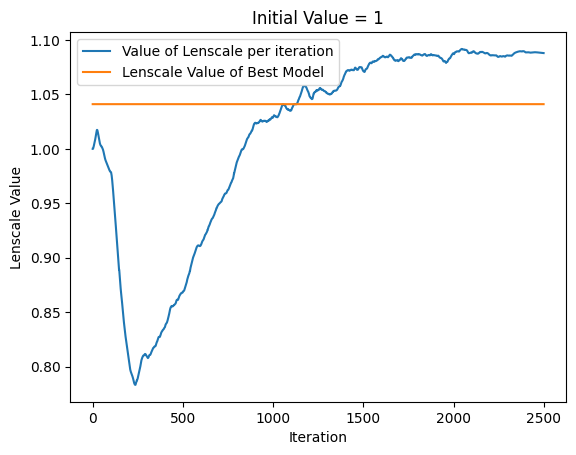

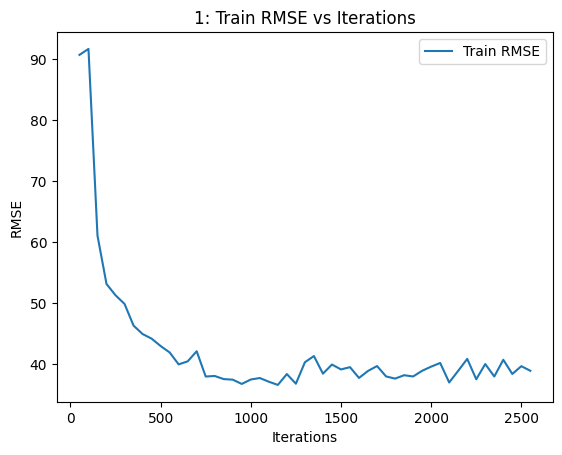

In [83]:
# For 1
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_1.txt")
best_lenscale = get_best_lenscale("20230701T164026")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "Initial Value = 1")
train_loss_plot("20230701T164026", 1)

Best Lengthscale value =  1.2191917


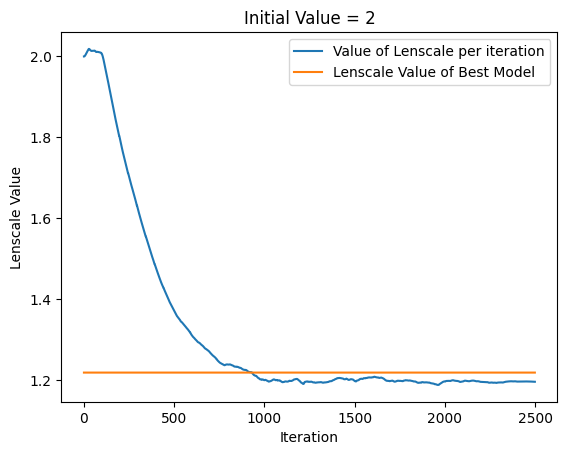

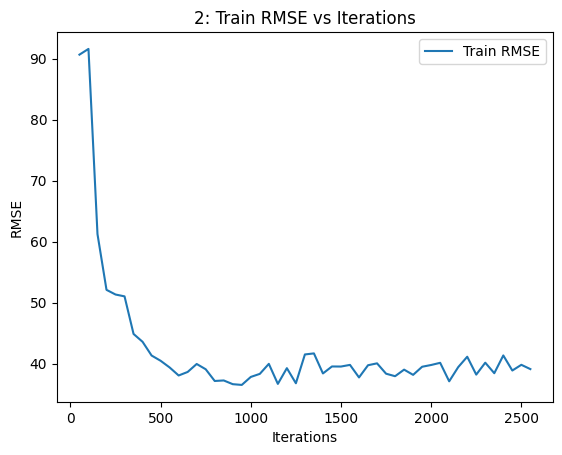

In [84]:
# For 2
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_2.txt")
best_lenscale = get_best_lenscale("20230701T164609")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "Initial Value = 2")
train_loss_plot("20230701T164609", 2)

Best Lengthscale value =  1.736702


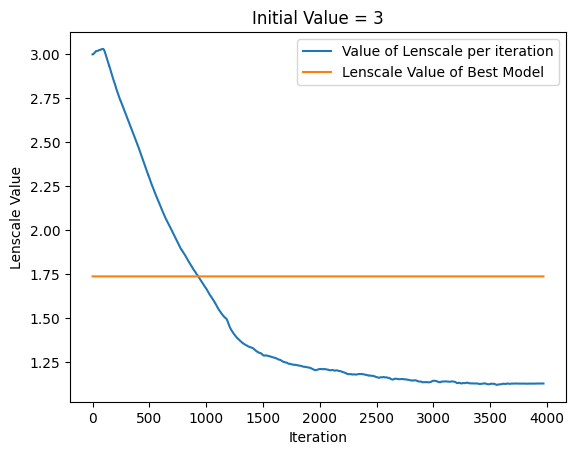

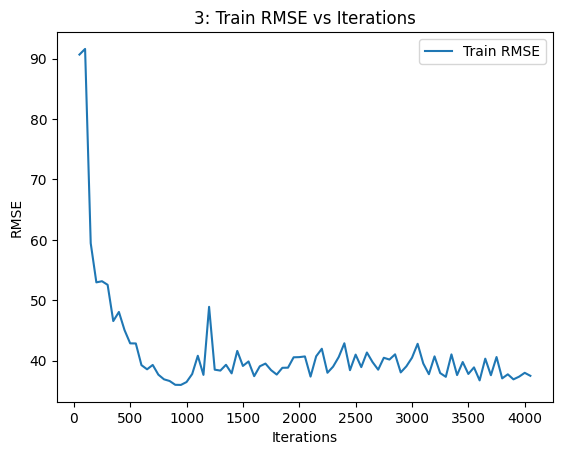

In [85]:
# For 3
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_3.txt")
best_lenscale = get_best_lenscale("20230701T191006")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "Initial Value = 3")
train_loss_plot("20230701T191006", 3)

Best Lengthscale value =  1.388387


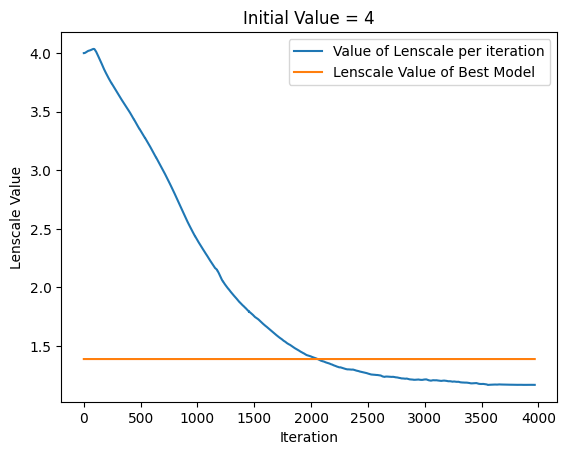

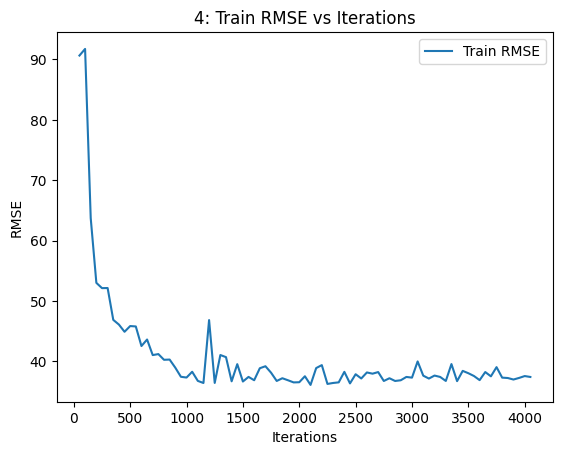

In [86]:
# For 4
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_4.txt")
best_lenscale = get_best_lenscale("20230701T190132")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "Initial Value = 4")
train_loss_plot("20230701T190132", 4)

Best Lengthscale value =  1.3952655


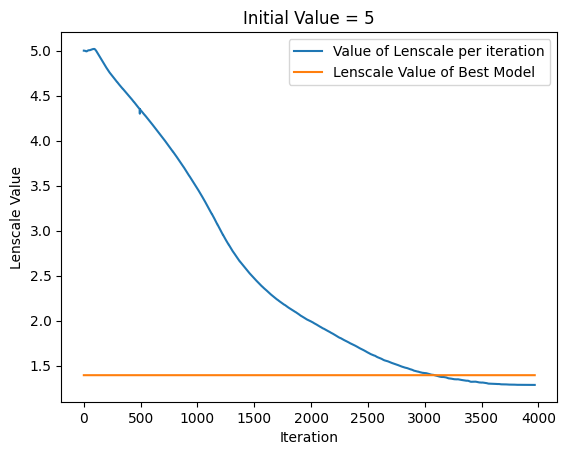

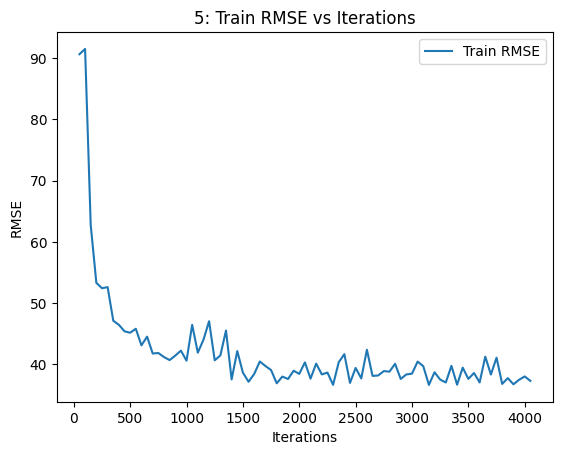

In [87]:
# For 5
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_5.txt")
best_lenscale = get_best_lenscale("20230701T185128")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "Initial Value = 5")
train_loss_plot("20230701T185128", 5)

Best Lengthscale value =  0.9797913


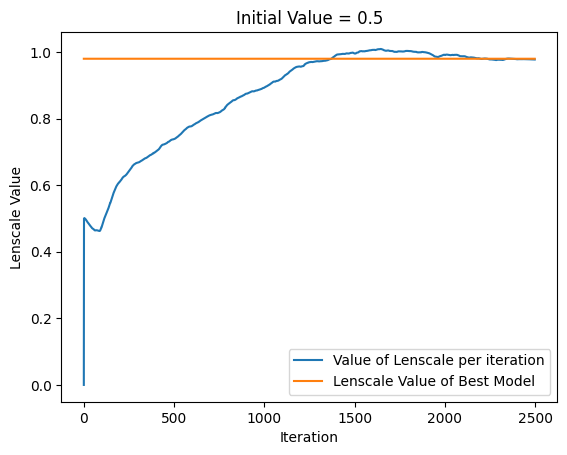

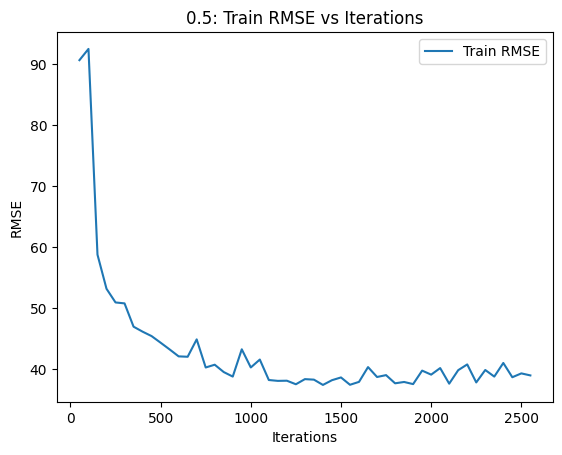

In [88]:
# For 0.5
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_half.txt")
best_lenscale = get_best_lenscale("20230701T170818")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "Initial Value = 0.5")
train_loss_plot("20230701T170818", 0.5)

Best Lengthscale value =  1.0318235


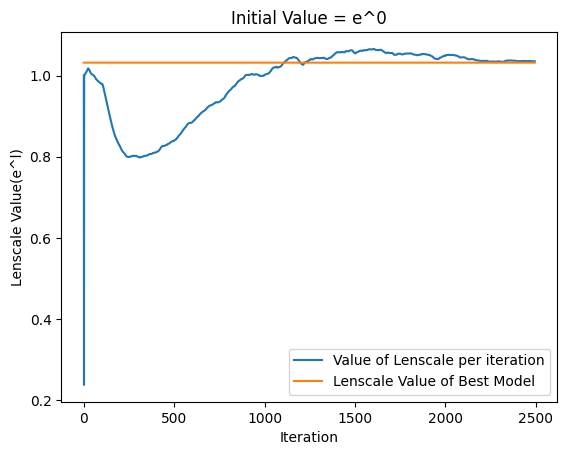

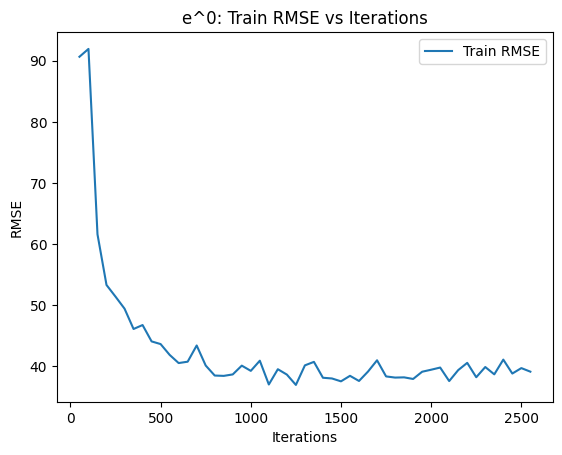

In [89]:
# For e0
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_e_0.txt")
best_lenscale = get_best_lenscale("20230701T192907")
print("Best Lengthscale value = ", np.exp(best_lenscale))
lenscale_plot(np.exp(lenscale_log), np.exp(best_lenscale), "Initial Value = e^0", e=True)
train_loss_plot("20230701T192907", "e^0")

Best Lengthscale value =  1.0920539


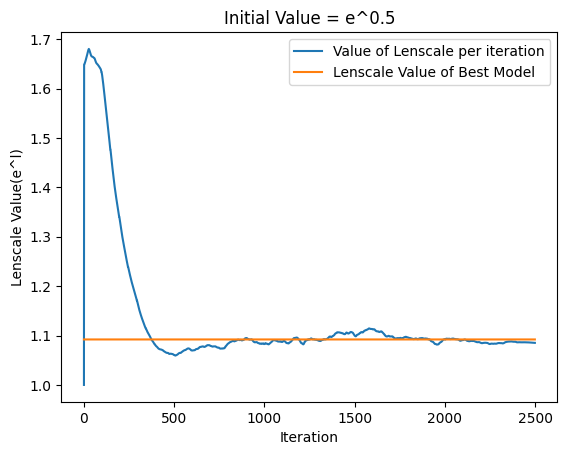

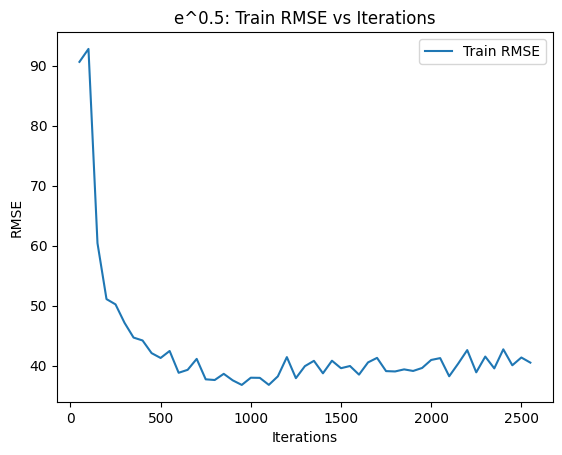

In [90]:
# For e0.5
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_e_half.txt")
best_lenscale = get_best_lenscale("20230701T171543")
print("Best Lengthscale value = ", np.exp(best_lenscale))
lenscale_plot(np.exp(lenscale_log), np.exp(best_lenscale), "Initial Value = e^0.5", e=True)
train_loss_plot("20230701T171543", "e^0.5")

Best Lengthscale value =  1.2300001


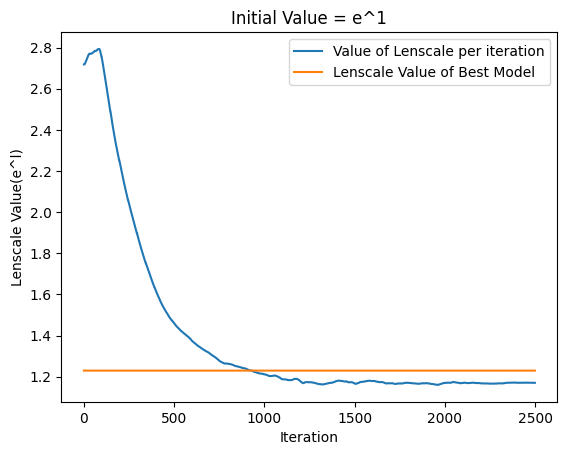

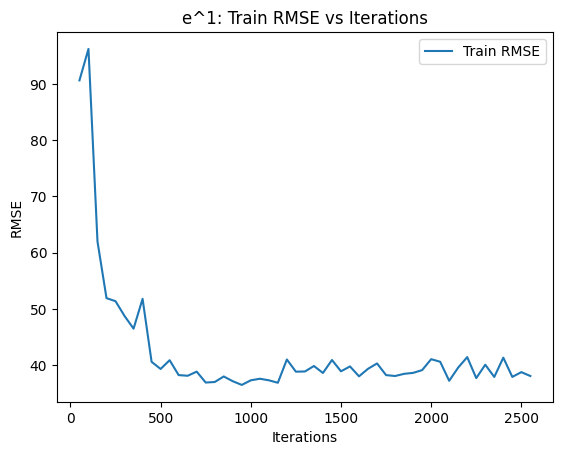

In [91]:
# For e1
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_e_1.txt")
best_lenscale = get_best_lenscale("20230701T172122")
print("Best Lengthscale value = ", np.exp(best_lenscale))
lenscale_plot(np.exp(lenscale_log), np.exp(best_lenscale), "Initial Value = e^1", e=True)
train_loss_plot("20230701T172122", "e^1")

Best Lengthscale value =  1.5505942


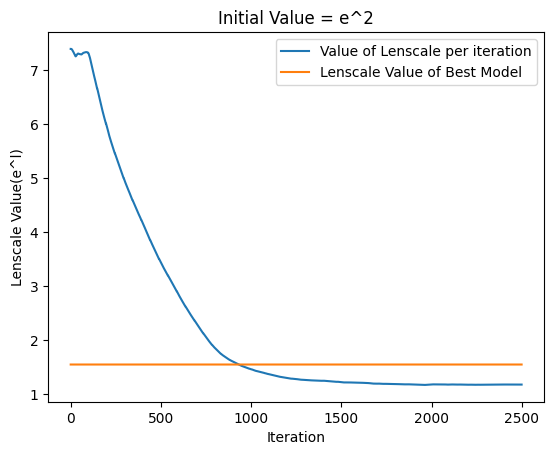

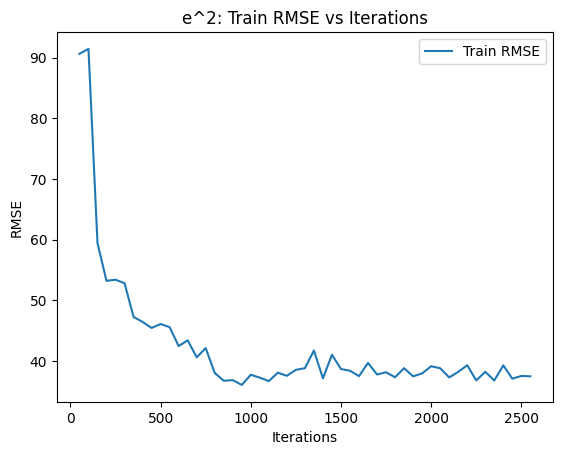

In [92]:
# For e2
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_init_from_e_2.txt")
best_lenscale = get_best_lenscale("20230701T172747")
print("Best Lengthscale value = ", np.exp(best_lenscale))
lenscale_plot(np.exp(lenscale_log), np.exp(best_lenscale), "Initial Value = e^2", e=True)
train_loss_plot("20230701T172747", "e^2")

Best Lengthscale value =  1.658294


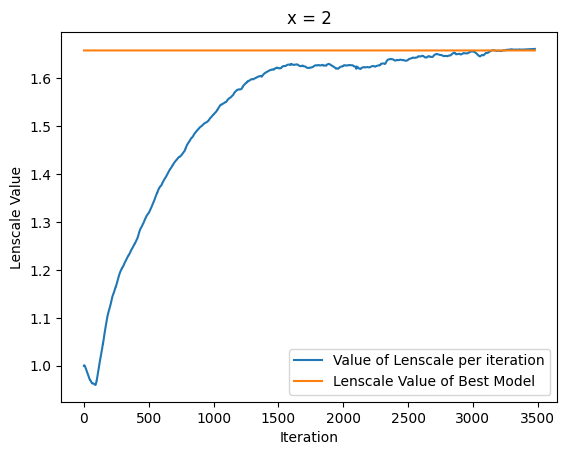

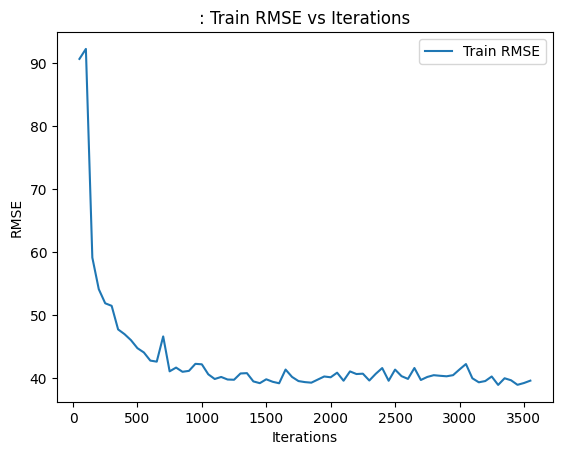

In [93]:
# std divided by 2
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_std_div_2.txt")
best_lenscale = get_best_lenscale("20230701T204654")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "x = 2")
train_loss_plot("20230701T204654", "")

Best Lengthscale value =  0.544981


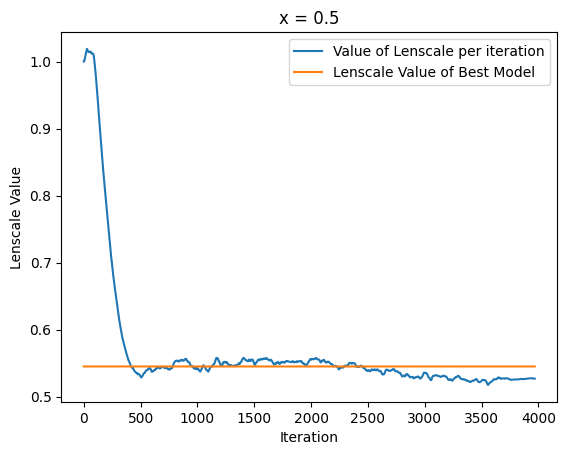

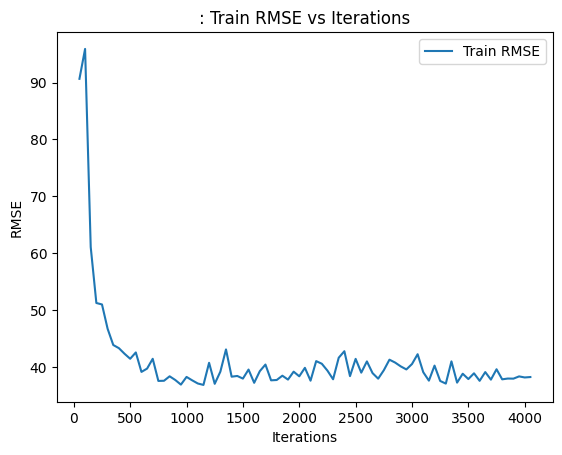

In [94]:
# std divided by 0.5
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_std_div_half.txt")
best_lenscale = get_best_lenscale("20230701T230955")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "x = 0.5")
train_loss_plot("20230701T230955", "")

Best Lengthscale value =  1.9753618


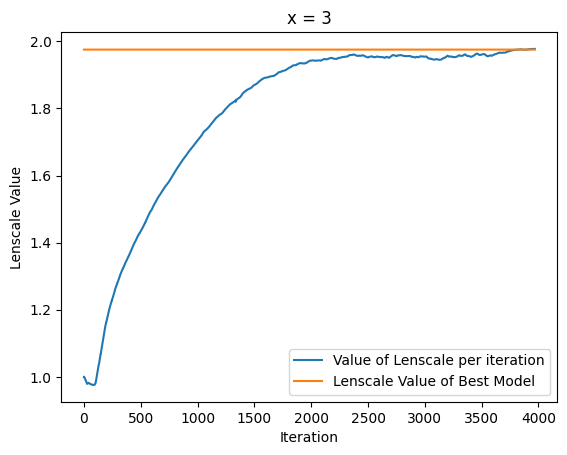

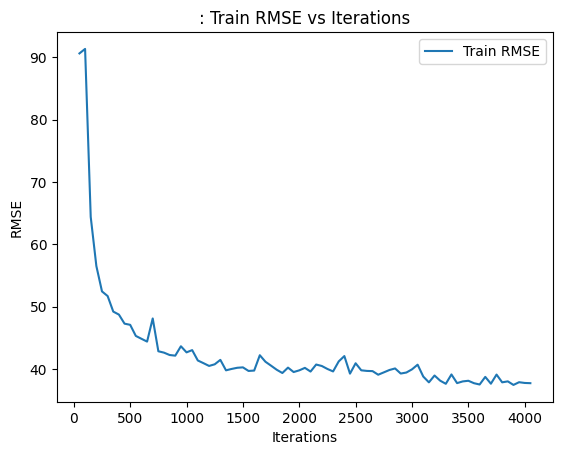

In [95]:
# std divided by 3
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_std_div_3.txt")
best_lenscale = get_best_lenscale("20230701T214914")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "x = 3")
train_loss_plot("20230701T214914", "")

Best Lengthscale value =  2.475708


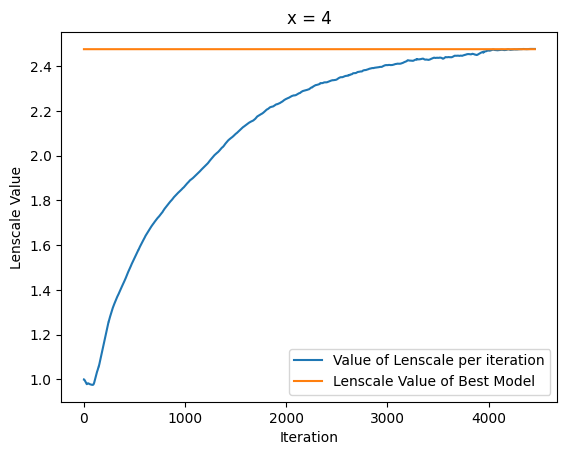

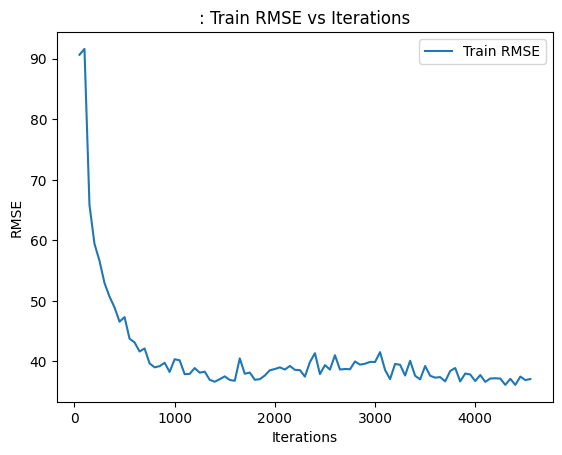

In [96]:
# std divided by 4
lenscale_log = lenscale_data("lenscale_logs/lenscale_log_std_div_4.txt")
best_lenscale = get_best_lenscale("20230701T213831")
print("Best Lengthscale value = ", best_lenscale)
lenscale_plot(lenscale_log, best_lenscale, "x = 4")
train_loss_plot("20230701T213831", "")

In [97]:
import pandas as pd
df = pd.read_csv("dataset/bjair/NP/processed_raw.csv")
df['w_norm'] = np.sqrt(df['u_speed']**2 + df['v_speed']**2)
df[['w_norm', 'wind_speed', 'v_speed', 'u_speed', 'wind_direction_9.0']]
features = [column for column in df.columns if column.startswith("wind_direction")]
df['wind_direction'] = df[features].idxmax(axis=1)
# df['wind_direction']
df[['u_speed', 'v_speed', 'wind_speed', 'wind_direction', 'w_norm']]
# df.columns


,u_speed,v_speed,wind_speed,wind_direction,w_norm
0,-5.600286,5.600286,7.92,wind_direction_13.0,7.92
1,-5.345727,5.345727,7.56,wind_direction_13.0,7.56
2,-4.072935,4.072935,5.76,wind_direction_13.0,5.76
3,-4.327494,4.327494,6.12,wind_direction_13.0,6.12
4,-4.680000,0.000000,4.68,wind_direction_1.0,4.68
...,...,...,...,...,...
306560,0.000000,0.000000,3.00,wind_direction_23.0,0.00
306561,0.000000,0.000000,2.60,wind_direction_23.0,0.00
306562,0.000000,0.000000,3.50,wind_direction_23.0,0.00
306563,0.000000,0.000000,3.10,wind_direction_23.0,0.00


In [22]:
import pandas as pd
df = pd.read_csv("dataset/bjair/NP/processed_raw.csv")
features = [column for column in df.columns if column.startswith("wind_direction")]
df['wind_direction'] = df[features].idxmax(axis=1)

mapping = {'wind_direction_13.0': 13, 'wind_direction_1.0': 1, 'wind_direction_3.0': 3,
           'wind_direction_9.0': 9, 'wind_direction_23.0': 23, 'wind_direction_24.0': 24,
           'wind_direction_4.0': 4, 'wind_direction_2.0': 2, 'wind_direction_14.0': 14,
           'wind_direction_0.0': 0}

df['wind_direction'] = df['wind_direction'].replace(mapping)
# df.columns
df.to_csv("dataset/bjair/NP/processed_raw_with_wind.csv", index=False)

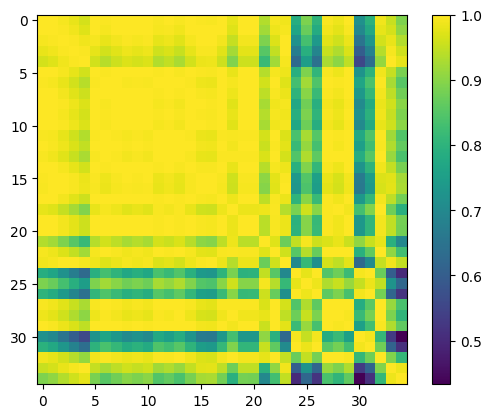

In [34]:
import numpy as np
import matplotlib.pyplot as plt

w = np.load("wind.npy")
plt.imshow(w)
plt.colorbar()